In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Carga de datos
cd = pd.read_csv('Datos_Mexico_limpio.csv') 
cd = cd.drop(['Unnamed: 0'], axis=1)
cd.head()

,Unnamed: 0.1,listing_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,neighbourhood_cleansed,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/35797,2010-06-28,a few days or more,0%,92%,f,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,...,4.70,4.80,4.80,4.80,4.70,1.0,1.0,0.0,0.0,1.70
1,1,https://www.airbnb.com/rooms/44616,2010-08-09,within an hour,100%,93%,t,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,2,https://www.airbnb.com/rooms/67703,2011-01-04,within an hour,71%,57%,t,"['email', 'phone']",Cuauhtémoc,Entire rental unit,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,3,https://www.airbnb.com/rooms/70644,2010-08-24,within a few hours,100%,100%,t,"['email', 'phone', 'work_email']",Coyoacán,Entire rental unit,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,4,https://www.airbnb.com/rooms/107078,2011-04-27,within an hour,100%,100%,t,"['email', 'phone']",Miguel Hidalgo,Entire loft,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11


In [ ]:
#Filtrar y transformar la variable "host_acceptance_rate"
#    - Primero eliminamos las filas donde "host_acceptance_rate" sea "S/D"
#    - Después, removemos el carácter "%" y convertimos la columna a tipo float


cd = cd[cd['host_acceptance_rate'] != 'S/D']
cd['host_acceptance_rate'] = (
    cd['host_acceptance_rate']
    .astype(str)  # Convertimos a string para usar .str
    .str.replace('%', '', regex=True)  # Quitamos el '%'
    .astype(float)  # Convertimos a float
)




In [ ]:
# Convertir la variable "host_is_superhost" a valores numéricos
#    - Sustituimos la 't' por 1 y la 'f' por 0
#    - Con astype(int), confirmamos el tipo de dato numérico entero

cd['host_is_superhost'] = (
    cd['host_is_superhost']
    .replace({'t': 1, 'f': 0})
    .astype(int)
)

In [ ]:
# Crear la columna "bathrooms" a partir de "bathrooms_text"
#    - Extraemos únicamente el número que aparece en "bathrooms_text" (puede ser decimal)
#    - Convertimos esos valores a float
#    - Eliminamos las filas que tengan valores nulos en "bathrooms" para evitar problemas

cd['bathrooms'] = (
    cd['bathrooms_text']
    .str.extract(r'(\d+\.?\d*)')
    .astype(float)
)
cd = cd[cd['bathrooms'].notnull()]

In [ ]:
 # Convertir "instant_bookable" a valores numéricos
#    - De la misma forma que con "host_is_superhost": 't' → 1, 'f' → 0

cd['instant_bookable'] = (
    cd['instant_bookable']
    .replace({'t': 1, 'f': 0})
    .astype(int)  # Conversión explícita para evitar FutureWarning
)


In [20]:
#Convertir la columna "property_type" a valores numéricos
#    - Cada tipo de propiedad se asocia con un código entero según el diccionario "types"
# ---------------------------------------------------------------------------------
types = {
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Private room in rental unit': 3,
    'Private room in home': 4,
    'Entire loft': 5,
    'Entire serviced apartment': 6
}
cd['property_type'] = cd['property_type'].replace(types)



In [21]:
# -------------------------------------------------------------------------
# 1) Crear dataframes separados según el tipo de habitación ('room_type')
#    - Se filtra el dataframe original (cd) según los valores de la columna room_type.
# -------------------------------------------------------------------------
cd_entire = cd[cd['room_type'] == 'Entire home/apt']   # Alojamientos completos
cd_private = cd[cd['room_type'] == 'Private room']     # Habitaciones privadas
cd_shared = cd[cd['room_type'] == 'Shared room']       # Habitaciones compartidas
cd_hotel = cd[cd['room_type'] == 'Hotel room']         # Habitaciones de hotel

# -------------------------------------------------------------------------
# 2) Mostrar la frecuencia de cada tipo de habitación en cada subset
#    - Utilizamos 'value_counts()' para contar cuántas filas hay de cada tipo.
#    - El argumento 'end="\n\n"' agrega un salto de línea extra entre cada impresión.
# -------------------------------------------------------------------------
print(cd_entire['room_type'].value_counts(), end='\n\n')
print(cd_private['room_type'].value_counts(), end='\n\n')
print(cd_shared['room_type'].value_counts(), end='\n\n')
print(cd_hotel['room_type'].value_counts(), end='\n\n')


room_type
Entire home/apt    17353
Name: count, dtype: int64

room_type
Private room    8631
Name: count, dtype: int64

room_type
Shared room    401
Name: count, dtype: int64

room_type
Hotel room    125
Name: count, dtype: int64



In [24]:
cd_entire['price'] = (
    cd_entire['price']
    .astype(str)  # Convertimos a string para asegurarnos
    .str.replace('[$,]', '', regex=True)  # Eliminamos '$' y ','
    .astype(float)  # Convertimos a float
)

model = LinearRegression()
model.fit(cd_entire[['host_acceptance_rate']], cd_entire['price'])  # Ahora debe funcionar


C:\Users\hp\AppData\Local\Temp\ipykernel_14192\1328563193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_entire['price'] = (


LinearRegression()

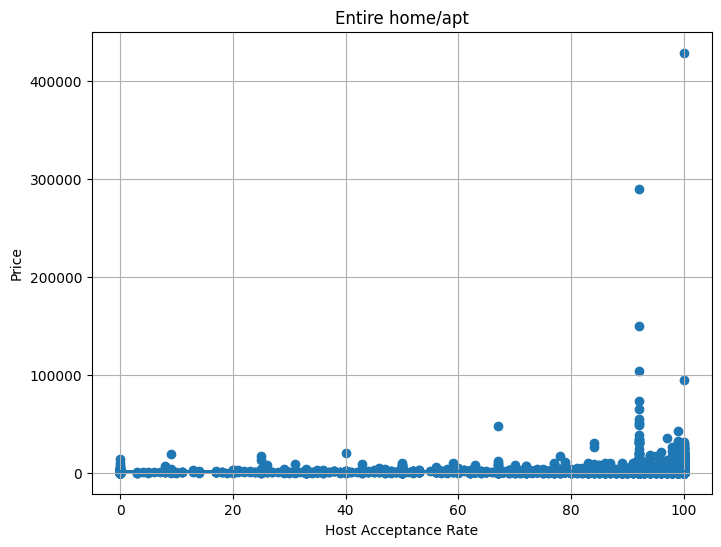

In [25]:

# 1) Crear y ajustar un modelo de regresión lineal
#    - Usamos 'host_acceptance_rate' como variable independiente (X).
#    - Definimos 'price' como variable dependiente (y).

model = LinearRegression()
model.fit(cd_entire[['host_acceptance_rate']], cd_entire['price'])


# 2) Visualizar la regresión lineal
#    - Generamos un diagrama de dispersión (scatter plot) con los datos reales.
#    - Sobre la misma gráfica, dibujamos la línea de mejor ajuste que produce el modelo.

plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
plt.scatter(cd_entire[['host_acceptance_rate']], cd_entire['price'])
plt.plot(
    cd_entire[['host_acceptance_rate']],
    model.predict(cd_entire[['host_acceptance_rate']])
)
plt.title('Entire home/apt')         # Título de la gráfica
plt.xlabel('Host Acceptance Rate')   # Etiqueta del eje X
plt.ylabel('Price')                  # Etiqueta del eje Y
plt.grid(True)                       # Muestra una cuadrícula para facilitar la lectura
plt.show()                           # Muestra la gráfica


In [26]:

# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo

m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)


# 2) Representar el modelo lineal de forma explícita
#    - Mostramos la ecuación en el formato y = m*x + b.

print(f'y = {m[0]}x + {b}', end='\n\n')


# 3) Evaluar el modelo con un indicador de desempeño
#    - Utilizamos model.score() para obtener el R^2, que mide qué tan bien el modelo
#      se ajusta a los datos (1 significa un ajuste perfecto, 0 significa nulo).

print('Puntaje del modelo:', model.score(cd_entire[['host_acceptance_rate']], cd_entire['price']))


Pendiente: [5.08188981]
Intercepto: 1203.3013371446948
y = 5.081889809233347x + 1203.3013371446948

Puntaje del modelo: 0.0003996030395004846


In [28]:
# Asegurar que 'price' esté en formato numérico
cd_private['price'] = (
    cd_private['price']
    .astype(str)  # Convertimos a string para evitar errores
    .str.replace('[$,]', '', regex=True)  # Eliminamos '$' y ','
    .astype(float)  # Convertimos a float
)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['host_acceptance_rate']], cd_private['price'])  # Ahora debe funcionar


C:\Users\hp\AppData\Local\Temp\ipykernel_14192\3380837372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_private['price'] = (


LinearRegression()

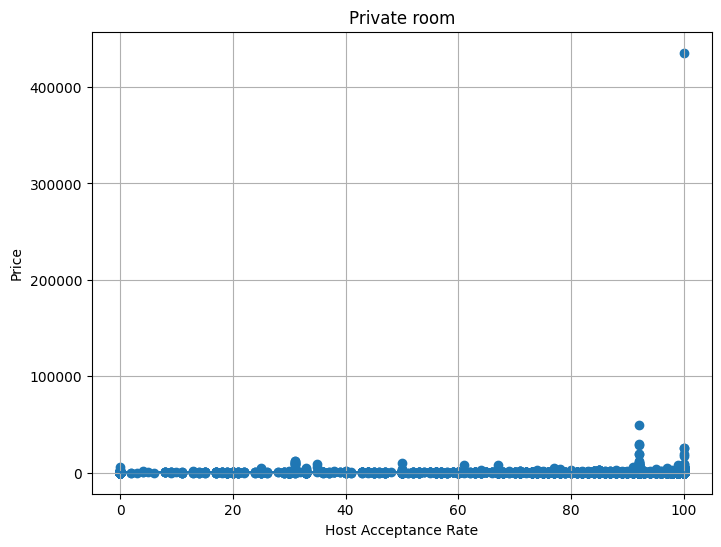

In [29]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['host_acceptance_rate']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
plt.scatter(cd_private[['host_acceptance_rate']], cd_private['price'])
plt.plot(
    cd_private[['host_acceptance_rate']],
    model.predict(cd_private[['host_acceptance_rate']])
)
plt.title('Private room')           # Título de la gráfica
plt.xlabel('Host Acceptance Rate')  # Etiqueta del eje X
plt.ylabel('Price')                 # Etiqueta del eje Y
plt.grid(True)                      # Activa la cuadrícula para una lectura más sencilla
plt.show()                          # Muestra la gráfica


In [30]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['host_acceptance_rate']], cd_private['price']))


Pendiente: [2.23016209]
Intercepto: 554.4210355223787
y = 2.2301620853737307x + 554.4210355223787

Puntaje del modelo: 0.0001533204635170149


In [ ]:
# Convertir 'host_acceptance_rate' a float 
cd_shared['host_acceptance_rate'] = (
    cd_shared['host_acceptance_rate']
    .astype(str)  # Convertimos a string
    .str.replace('%', '', regex=True)  # Eliminamos '%'
    .astype(float)  # Convertimos a float
)

# Convertir 'price' a float 
cd_shared['price'] = (
    cd_shared['price']
    .astype(str)  # Convertimos a string
    .str.replace('[$,]', '', regex=True)  # Eliminamos '$' y ','
    .astype(float)  # Convertimos a float
)


C:\Users\hp\AppData\Local\Temp\ipykernel_14192\1764484544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_shared['host_acceptance_rate'] = (
C:\Users\hp\AppData\Local\Temp\ipykernel_14192\1764484544.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_shared['price'] = (


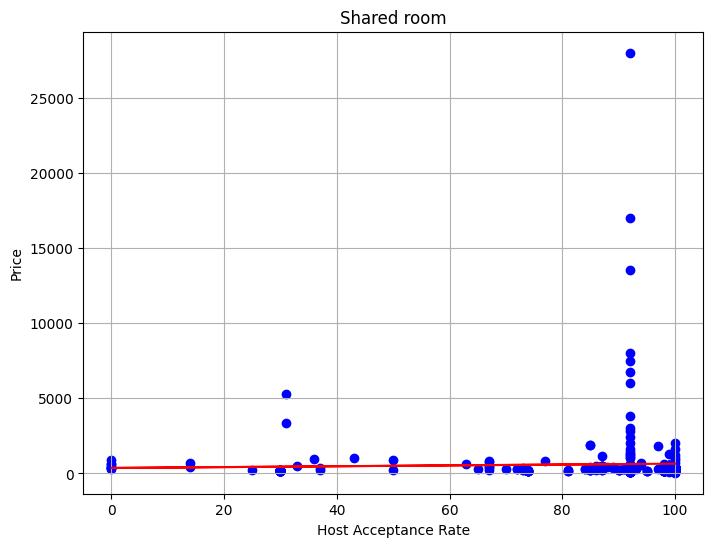

In [33]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['host_acceptance_rate']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_acceptance_rate']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['host_acceptance_rate']],
    model.predict(cd_shared[['host_acceptance_rate']]), color='red'
)
plt.title('Shared room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [34]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['host_acceptance_rate']], cd_shared['price']))

Pendiente: [2.85558393]
Intercepto: 366.6163263682791
y = 2.855583928992657x + 366.6163263682791

Puntaje del modelo: 0.001656314877999332


In [36]:
# Convertir 'price' a valores numéricos
cd_hotel['price'] = (
    cd_hotel['price']
    .astype(str)  # Convertimos a string para evitar errores
    .str.replace('[$,]', '', regex=True)  # Eliminamos '$' y ','
    .astype(float)  # Convertimos a float
)

# Convertir 'host_acceptance_rate' a float si aún no lo has hecho
cd_hotel['host_acceptance_rate'] = (
    cd_hotel['host_acceptance_rate']
    .astype(str)
    .str.replace('%', '', regex=True)
    .astype(float)
)

# Ahora entrena el modelo
model = LinearRegression()
model.fit(cd_hotel[['host_acceptance_rate']], cd_hotel['price'])


C:\Users\hp\AppData\Local\Temp\ipykernel_14192\3000213699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_hotel['price'] = (
C:\Users\hp\AppData\Local\Temp\ipykernel_14192\3000213699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_hotel['host_acceptance_rate'] = (


LinearRegression()

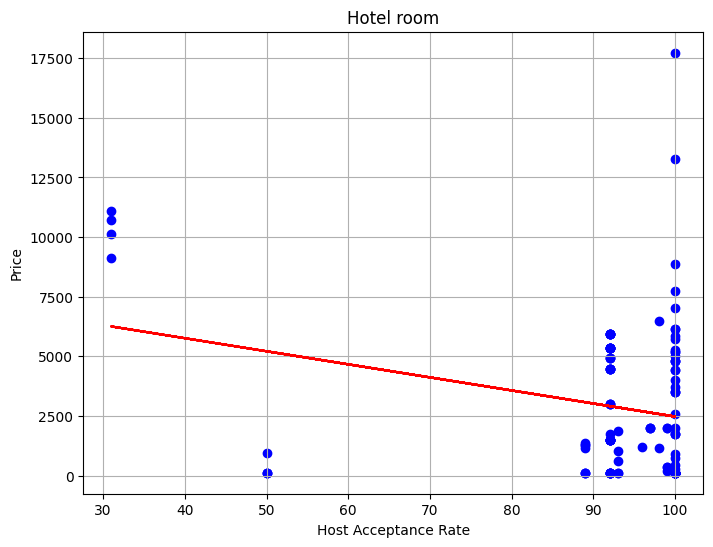

In [37]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['host_acceptance_rate']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_acceptance_rate']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['host_acceptance_rate']], 
    model.predict(cd_hotel[['host_acceptance_rate']]), color='red'
)
plt.title('Hotel room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [38]:
# 1) Obtener los parámetros de la regresión lineal en habitaciones privadas
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Mostrar la ecuación resultante del modelo
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el rendimiento del modelo mediante el coeficiente de determinación (R²)
print('Puntaje del modelo:', model.score(cd_hotel[['host_acceptance_rate']], cd_hotel['price']))

Pendiente: [-54.7541606]
Intercepto: 7950.54910532347
y = -54.754160602025394x + 7950.54910532347

Puntaje del modelo: 0.06356033922932791


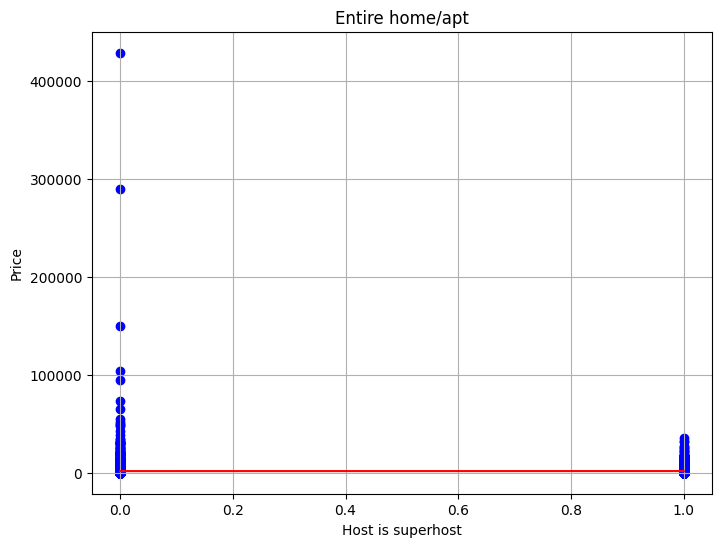

In [39]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['host_is_superhost']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['host_is_superhost']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['host_is_superhost']], 
    model.predict(cd_entire[['host_is_superhost']]), color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [40]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['host_is_superhost']], cd_entire['price']))

Pendiente: [-54.7541606]
Intercepto: 1652.692985428667
y = -54.754160602025394x + 1652.692985428667

Puntaje del modelo: 1.8663131683860357e-05


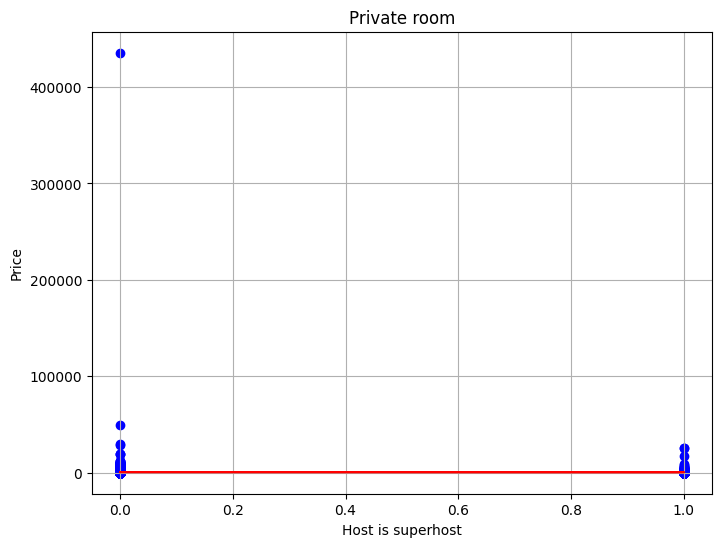

In [41]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['host_is_superhost']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_is_superhost']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['host_is_superhost']],
    model.predict(cd_private[['host_is_superhost']]), color='red'
)
plt.title('Private room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [42]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['host_is_superhost']], cd_private['price']))

Pendiente: [-79.69689649]
Intercepto: 767.6199734130936
y = -79.69689649001542x + 767.6199734130936

Puntaje del modelo: 5.730738351539255e-05


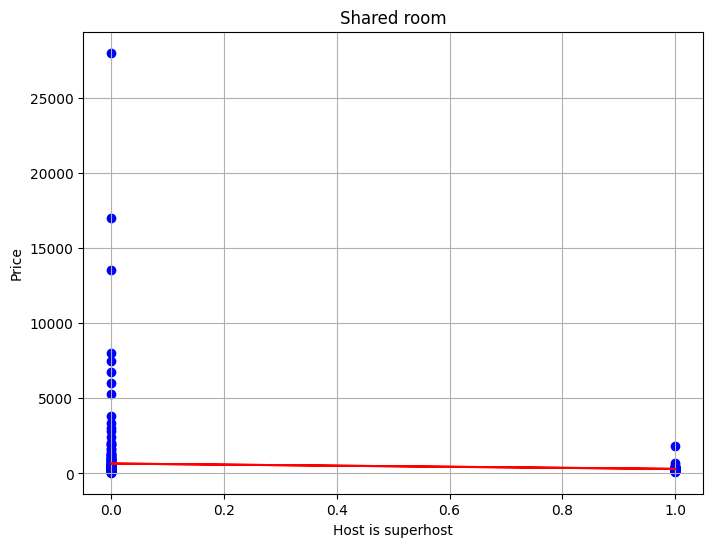

In [43]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['host_is_superhost']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_is_superhost']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['host_is_superhost']], model.predict(cd_shared[['host_is_superhost']]), color='red')
plt.title('Shared room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [44]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['host_is_superhost']], cd_shared['price']))

Pendiente: [-356.36357136]
y = -356.36357136473333x + 659.7964071856287

Puntaje del modelo: 0.00482716176407938


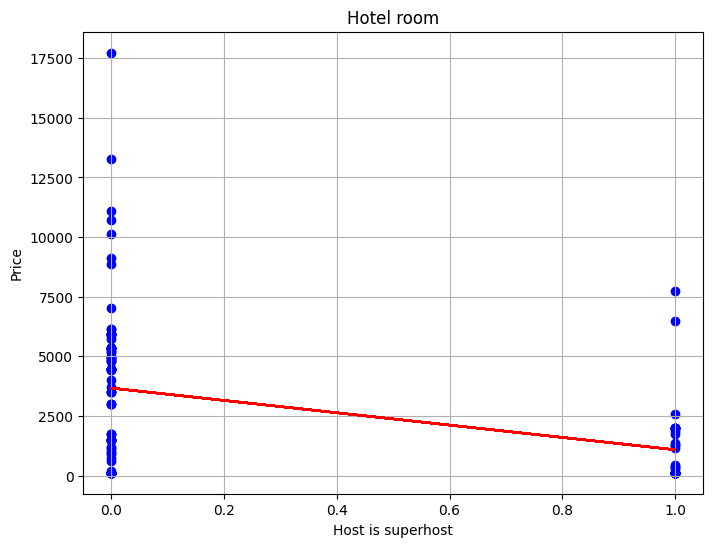

In [45]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['host_is_superhost']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_is_superhost']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['host_is_superhost']],
    model.predict(cd_hotel[['host_is_superhost']]), color='red'
)
plt.title('Hotel room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [46]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['host_is_superhost']], cd_hotel['price']))

Pendiente: [-2585.00272232]
Intercepto: 3668.3448275862065
y = -2585.002722323048x + 3668.3448275862065

Puntaje del modelo: 0.14504251431744308


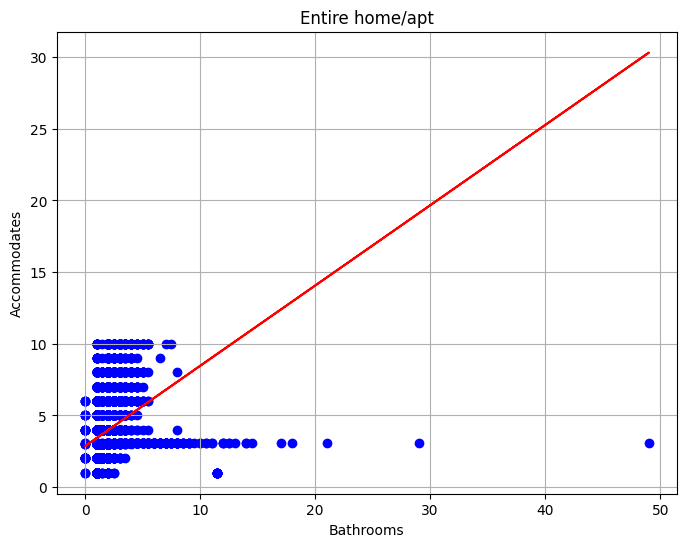

In [47]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['bathrooms']], cd_entire['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['bathrooms']], cd_entire['accommodates'], color='blue')
plt.plot(
    cd_entire[['bathrooms']],
    model.predict(cd_entire[['bathrooms']]), color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [48]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['bathrooms']], cd_entire['accommodates']))

Pendiente: [0.56024288]
Intercepto: 2.854045154236769
y = 0.5602428753007621x + 2.854045154236769

Puntaje del modelo: 0.11322119326031943


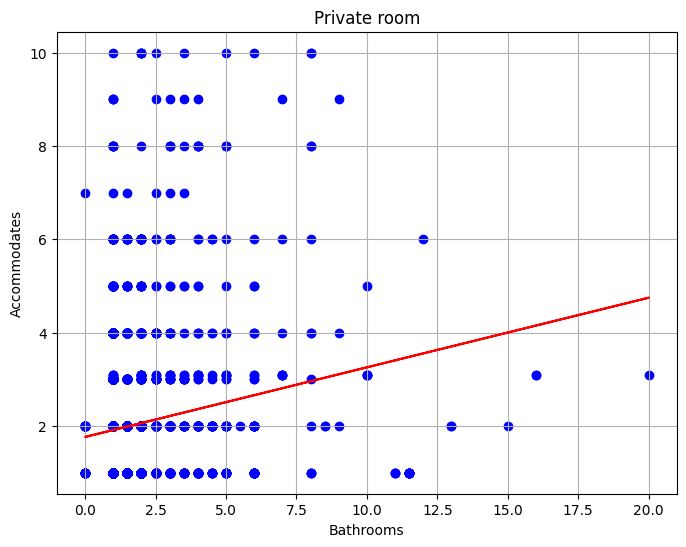

In [49]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['bathrooms']], cd_private['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['bathrooms']], cd_private['accommodates'], color='blue')
plt.plot(
    cd_private[['bathrooms']],
    model.predict(cd_private[['bathrooms']]), color='red'
)
plt.title('Private room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [50]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['bathrooms']], cd_private['accommodates']))

Pendiente: [0.14920325]
Intercepto: 1.7663832715762098
y = 0.14920324619776712x + 1.7663832715762098

Puntaje del modelo: 0.021148462603684193


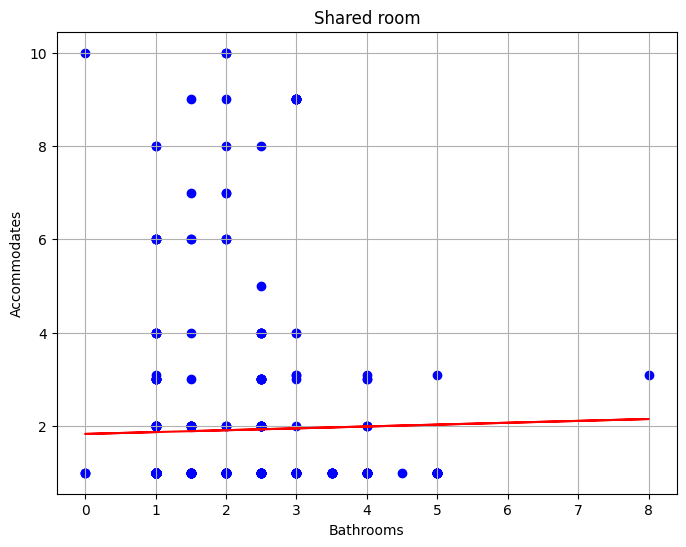

In [51]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['bathrooms']], cd_shared['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['bathrooms']], cd_shared['accommodates'], color='blue')
plt.plot(
    cd_shared[['bathrooms']], 
    model.predict(cd_shared[['bathrooms']]), color='red'
)
plt.title('Shared room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [52]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['bathrooms']], cd_shared['accommodates']))

Pendiente: [0.03999903]
Intercepto: 1.8308747163289536
y = 0.03999903087471636x + 1.8308747163289536

Puntaje del modelo: 0.0006437096085398775


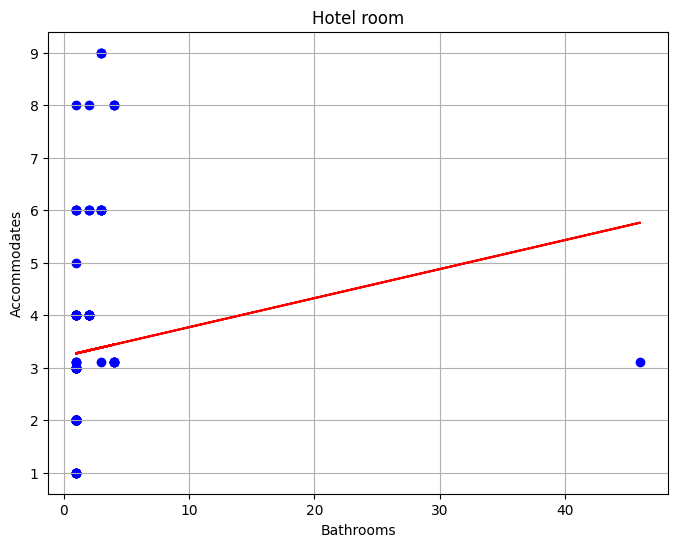

In [53]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['bathrooms']], cd_hotel['accommodates'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['bathrooms']], cd_hotel['accommodates'], color='blue')
plt.plot(
    cd_hotel[['bathrooms']],
    model.predict(cd_hotel[['bathrooms']]), color='red'
)
plt.title('Hotel room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [54]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['bathrooms']], cd_hotel['accommodates']))

Pendiente: [0.05529183]
Intercepto: 3.219147700432887
y = 0.05529183090302252x + 3.219147700432887

Puntaje del modelo: 0.014477512634336831


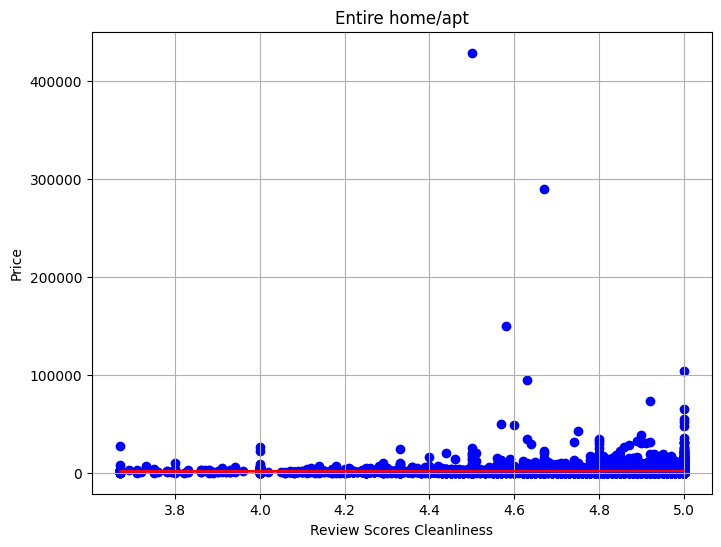

In [55]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['review_scores_cleanliness']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['review_scores_cleanliness']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['review_scores_cleanliness']], 
    model.predict(cd_entire[['review_scores_cleanliness']]), color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [56]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['review_scores_cleanliness']], cd_entire['price']))

Pendiente: [272.676898]
y = 272.6768979956565x + 363.31688318373585

Puntaje del modelo: 0.00015603838456812458


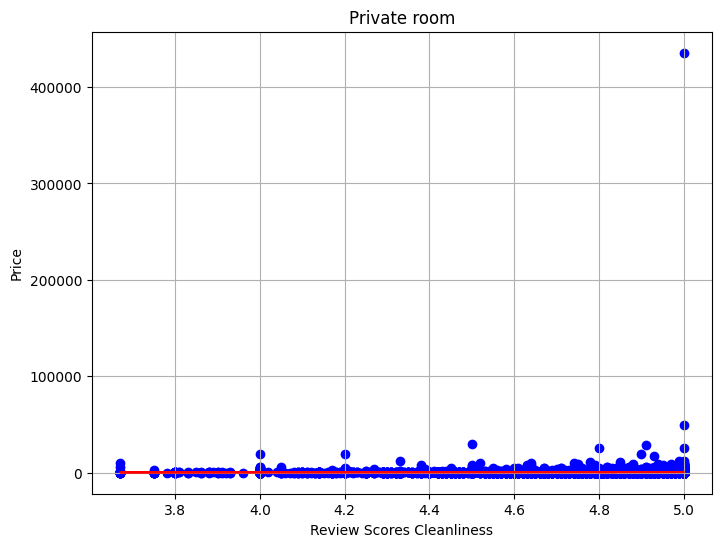

In [57]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['review_scores_cleanliness']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['review_scores_cleanliness']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['review_scores_cleanliness']],
    model.predict(cd_private[['review_scores_cleanliness']]), color='red'
)
plt.title('Private room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [58]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['review_scores_cleanliness']], cd_private['price']))


Pendiente: [233.72778563]
y = 233.7277856348789x + -373.1071606324473

Puntaje del modelo: 0.00015820117418474666


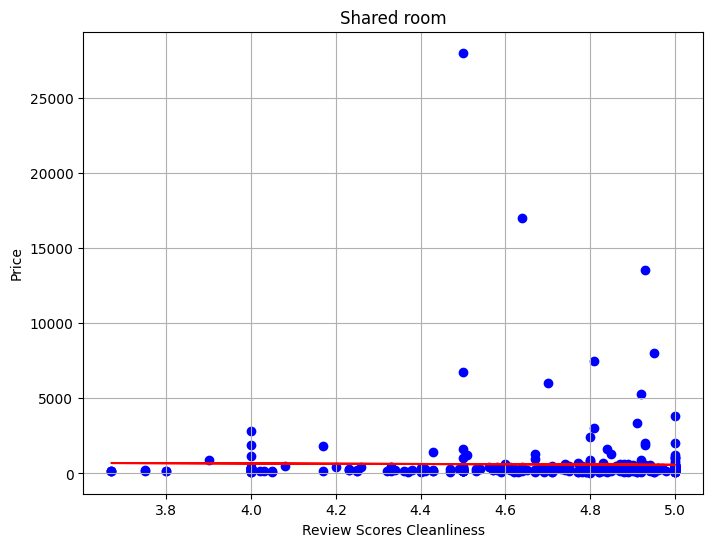

In [59]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['review_scores_cleanliness']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['review_scores_cleanliness']], cd_shared['price'], color='blue')
plt.plot(
    cd_shared[['review_scores_cleanliness']],
    model.predict(cd_shared[['review_scores_cleanliness']]), color='red'
)
plt.title('Shared room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [60]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['review_scores_cleanliness']], cd_shared['price']))

Pendiente: [-89.35812894]
y = -89.35812893859152x + 1023.6692787935605

Puntaje del modelo: 0.00021215989356349052


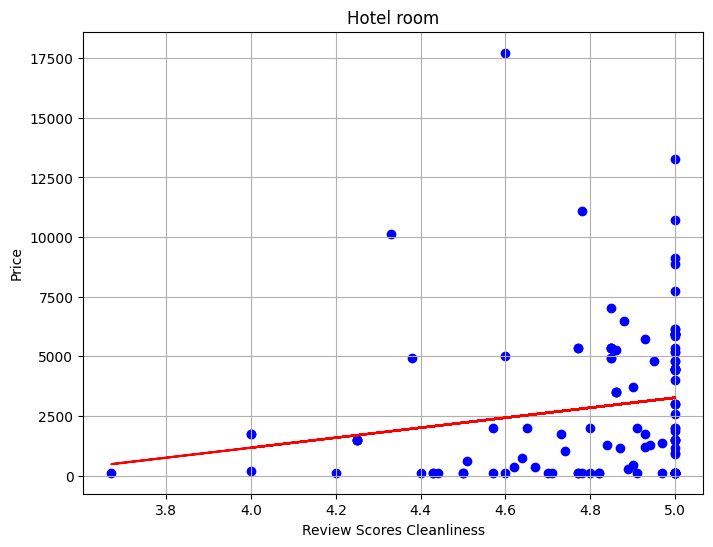

In [61]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['review_scores_cleanliness']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['review_scores_cleanliness']], cd_hotel['price'], color='blue')
plt.plot(cd_hotel[['review_scores_cleanliness']], model.predict(cd_hotel[['review_scores_cleanliness']]), color='red')
plt.title('Hotel room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [62]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['review_scores_cleanliness']], cd_hotel['price']))

Pendiente: [2094.59369747]
Intercepto: -7208.075461927002
y = 2094.5936974673273x + -7208.075461927002

Puntaje del modelo: 0.03196067802799396


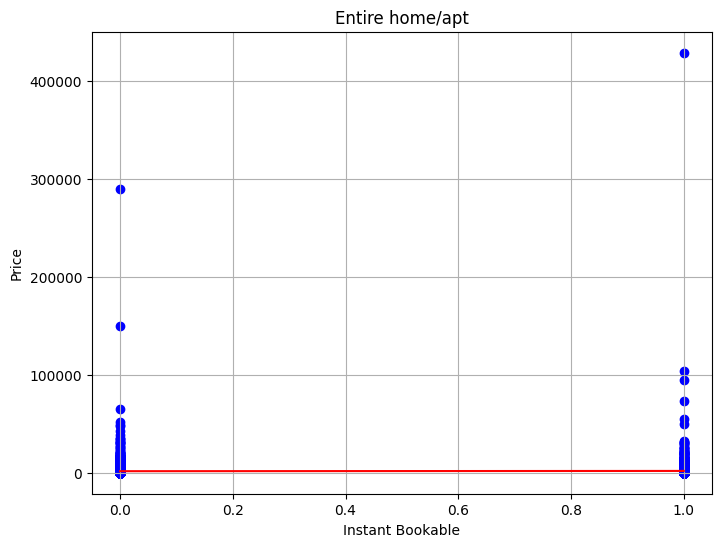

In [66]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['instant_bookable']], cd_entire['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['instant_bookable']], cd_entire['price'], color='blue')
plt.plot(
    cd_entire[['instant_bookable']],
    model.predict(cd_entire[['instant_bookable']]), color='red'
)
plt.title('Entire home/apt')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [67]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['instant_bookable']], cd_entire['price']))

Pendiente: [276.01304747]
Intercepto: 1556.7553519864578
y = 276.0130474663475x + 1556.7553519864578

Puntaje del modelo: 0.0008049589403199553


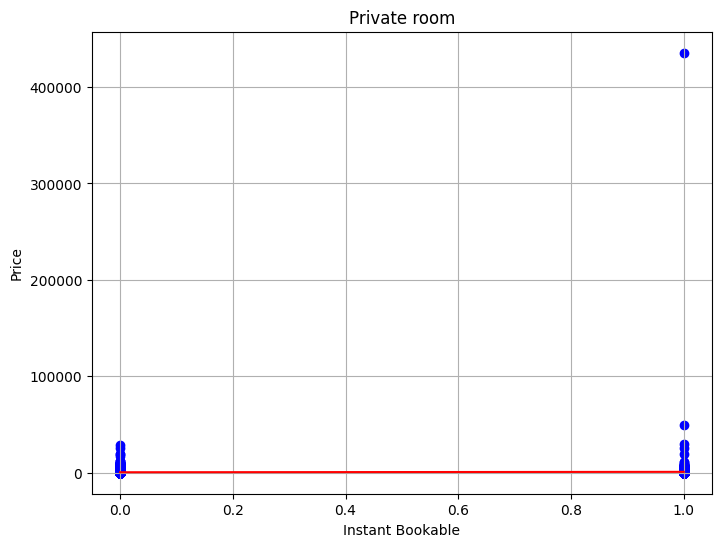

In [68]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['instant_bookable']], cd_private['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['instant_bookable']], cd_private['price'], color='blue')
plt.plot(
    cd_private[['instant_bookable']],
    model.predict(cd_private[['instant_bookable']]), color='red'
)
plt.title('Private room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [69]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['instant_bookable']], cd_private['price']))

Pendiente: [425.36200517]
Intercepto: 602.5425402876454
y = 425.36200516689956x + 602.5425402876454

Puntaje del modelo: 0.0017134469564676902


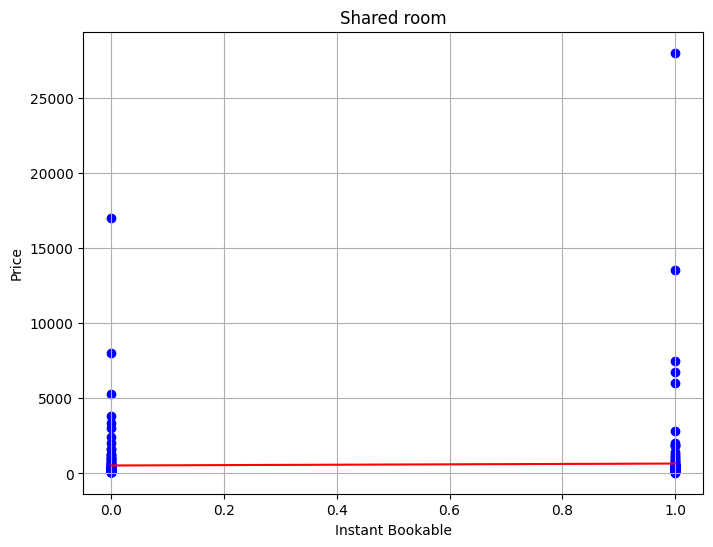

In [70]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_shared[['instant_bookable']], cd_shared['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['instant_bookable']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['instant_bookable']], model.predict(cd_shared[['instant_bookable']]), color='red')
plt.title('Shared room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [71]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_shared[['instant_bookable']], cd_shared['price']))

Pendiente: [128.18779049]
Intercepto: 531.8449197860962
y = 128.18779049427772x + 531.8449197860962

Puntaje del modelo: 0.0011169472974895678


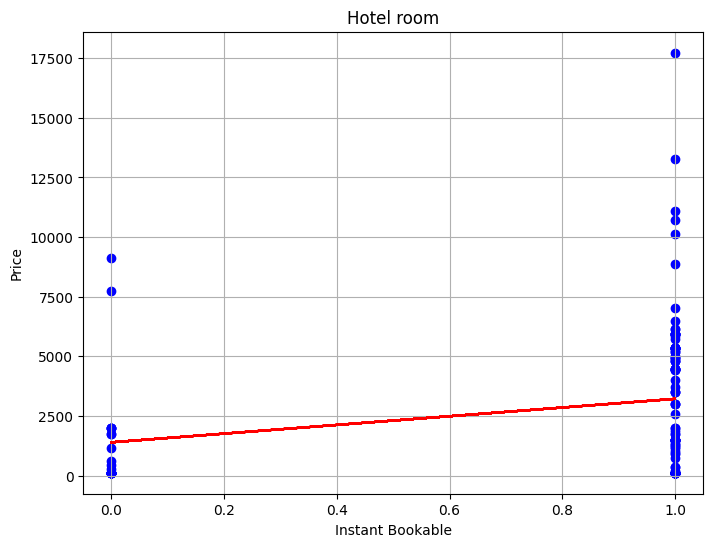

In [72]:
# 1) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_hotel[['instant_bookable']], cd_hotel['price'])

# 2) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['instant_bookable']], cd_hotel['price'], color='blue')
plt.plot(
    cd_hotel[['instant_bookable']],
    model.predict(cd_hotel[['instant_bookable']]), color='red'
)
plt.title('Hotel room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [73]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_hotel[['instant_bookable']], cd_hotel['price']))

Pendiente: [1823.02813299]
Intercepto: 1394.913043478262
y = 1823.0281329923262x + 1394.913043478262

Puntaje del modelo: 0.05119000949509178


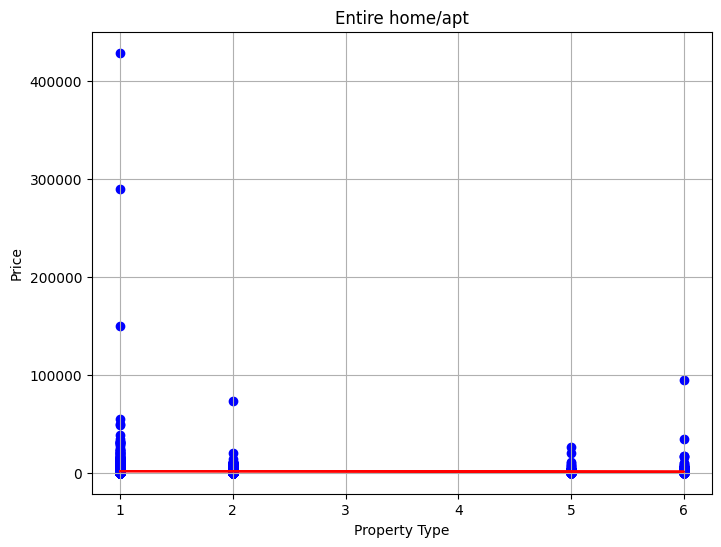

In [74]:

# 1) Filtrar valores no numéricos en la columna "property_type" del dataframe cd_entire

cd_entire = cd_entire[pd.to_numeric(cd_entire['property_type'], errors='coerce').notnull()]

# 2) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_entire[['property_type']], cd_entire['price'])

# 3) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['property_type']], cd_entire['price'], color='blue')
plt.plot(cd_entire[['property_type']], model.predict(cd_entire[['property_type']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [75]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_entire[['property_type']], cd_entire['price']))

Pendiente: [-86.52787883]
Intercepto: 1730.9619244640235
y = -86.52787882920464x + 1730.9619244640235

Puntaje del modelo: 0.0007819676250691021


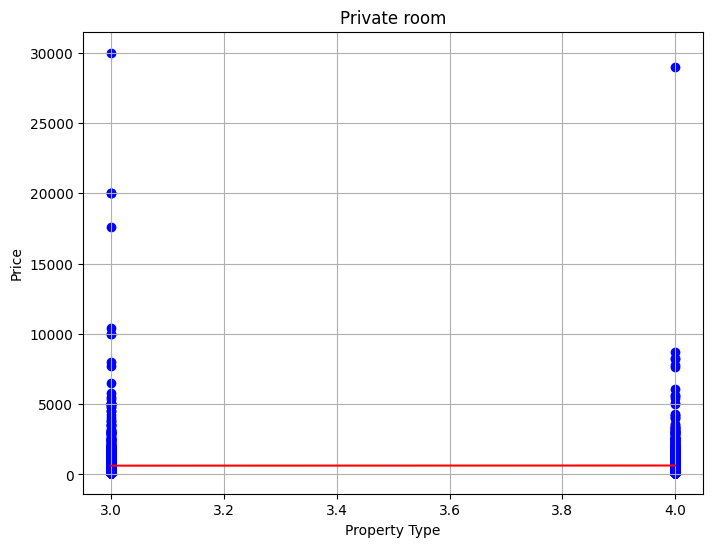

In [76]:
# ---------------------------------------------------------------------------------
# 1) Filtrar valores no numéricos en la columna "property_type" del dataframe cd_private

cd_private = cd_private[pd.to_numeric(cd_private['property_type'], errors='coerce').notnull()]

# 2) Crear y ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(cd_private[['property_type']], cd_private['price'])

# 3) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['property_type']], cd_private['price'], color='blue')
plt.plot(cd_private[['property_type']], model.predict(cd_private[['property_type']]), color='red')
plt.title('Private room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [77]:
# 1) Obtener los parámetros (pendiente y ordenada en el origen) del modelo
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# 2) Representar el modelo lineal de forma explícita
print(f'y = {m[0]}x + {b}', end='\n\n')

# 3) Evaluar el modelo con un indicador de desempeño
print('Puntaje del modelo:', model.score(cd_private[['property_type']], cd_private['price']))

Pendiente: [9.83665451]
Intercepto: 594.0958953124893
y = 9.836654514123655x + 594.0958953124893

Puntaje del modelo: 2.3449874527625703e-05


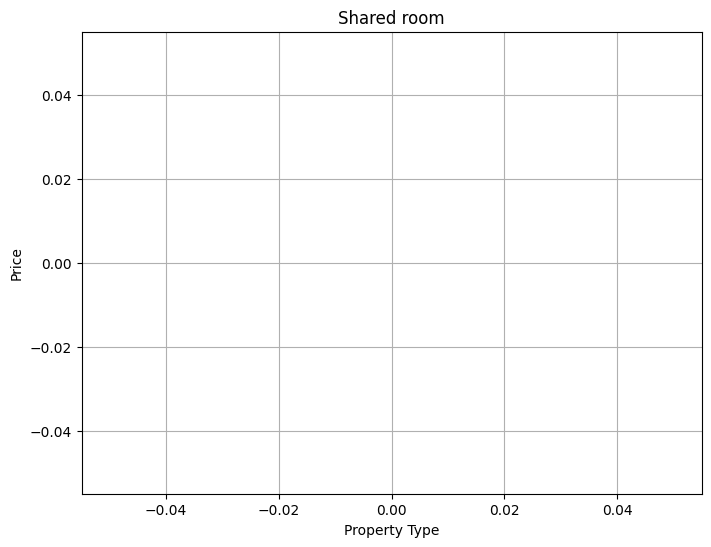

In [78]:
# 1) Filtrar valores no numéricos en la columna "property_type" del dataframe cd_shared

cd_shared = cd_shared[pd.to_numeric(cd_shared['property_type'], errors='coerce').notnull()]

# ---------------------------------------------------------------------------------
# 2) Crear instancia del modelo (aunque en este caso no entrenamos el modelo debido
#    a que al parecer no existen registros de los 6 tipos de propiedad deseados).


model = LinearRegression()
#plt.plot(ny_shared[['property_type']], model.predict(ny_shared[['property_type']]), color='red')

# ---------------------------------------------------------------------------------
# 3) Visualizar la distribución de 'property_type' contra 'price'
#    - Trazamos únicamente el diagrama de dispersión (scatter), sin la línea de regresión.

plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['property_type']], cd_shared['price'])
# plt.plot(...)  # Línea de regresión comentada, ya que no se ha entrenado el modelo

plt.title('Shared room')         # Título de la gráfica
plt.xlabel('Property Type')       # Etiqueta del eje X
plt.ylabel('Price')               # Etiqueta del eje Y
plt.grid(True)                    # Cuadrícula para facilitar la lectura
plt.show()                        # Muestra la gráfica


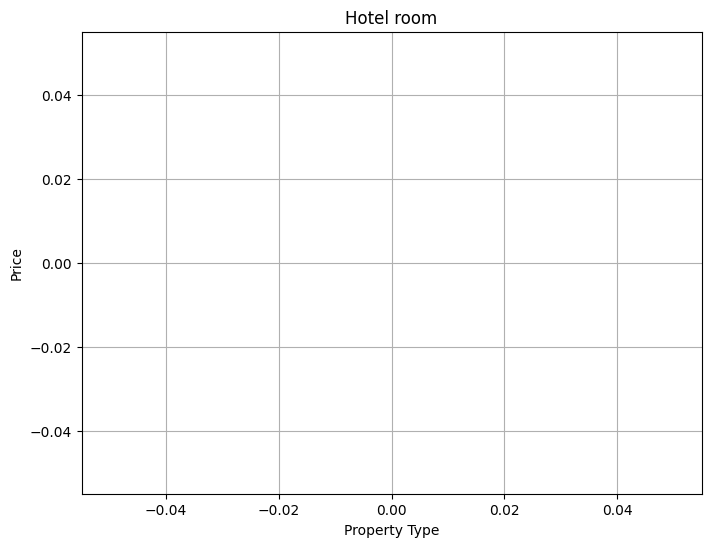

In [79]:
# 1) Filtrar valores no numéricos en la columna "property_type"
cd_hotel = cd_hotel[pd.to_numeric(cd_hotel['property_type'], errors='coerce').notnull()]

# 2) Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
#model.fit(cd_hotel[['property_type']], cd_hotel['price'])

# 3) Visualizar la relación y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['property_type']], cd_hotel['price'], color='blue')
#plt.plot(cd_hotel[['property_type']], model.predict(cd_hotel[['property_type']]), color='red')
plt.title('Hotel room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()